# 2.1

In [1]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

Сначала воспользуемся матричной формой ДПФ для вычисления

In [8]:
N = 8
x = np.array([7., 3., 2., -4., 6., 0., -4., 1.]) # мой вариант
W8 = dft(N)
Xn = W8 @ x
Xn

array([11.        +0.00000000e+00j,  6.65685425-4.58578644e+00j,
       15.        -6.00000000e+00j, -4.65685425+7.41421356e+00j,
       11.        +7.34788079e-16j, -4.65685425-7.41421356e+00j,
       15.        +6.00000000e+00j,  6.65685425+4.58578644e+00j])

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ)

In [9]:
Xn1=np.fft.fft(x)
Xn1

array([11.        +0.j        ,  6.65685425-4.58578644j,
       15.        -6.j        , -4.65685425+7.41421356j,
       11.        +0.j        , -4.65685425-7.41421356j,
       15.        +6.j        ,  6.65685425+4.58578644j])

Сравним результаты

In [10]:
max(abs(Xn1-Xn))

1.1546319456101628e-14

Видим, что результаты отличаются на ничтожно-малую величину

# 2.2

<IPython.core.display.Javascript object>


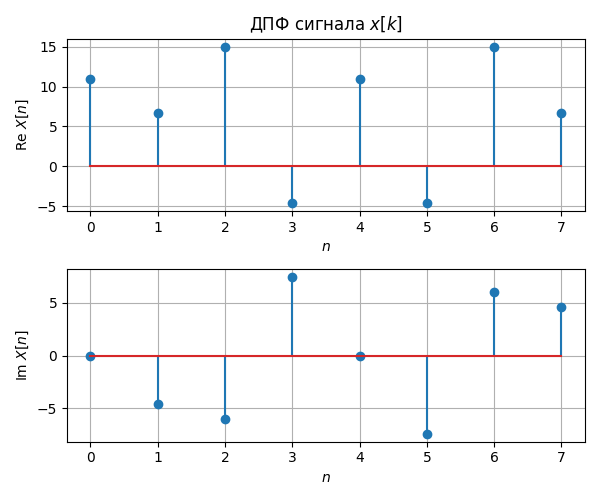

<IPython.core.display.Javascript object>


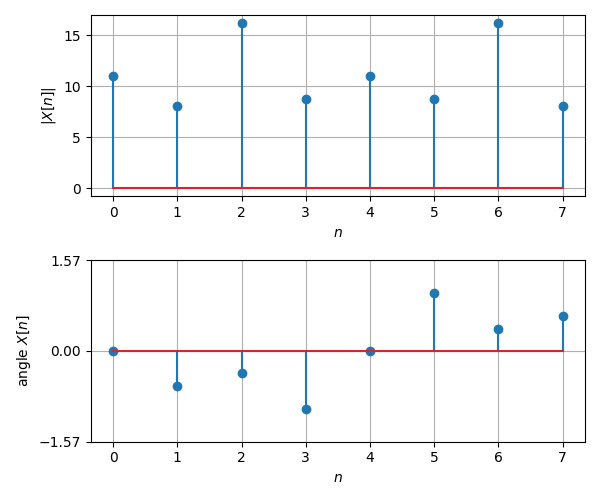

In [44]:
plt.figure(figsize=[6, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $x[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=[6, 5])

plt.subplot(2, 1, 1)
plt.stem(n, np.sqrt(Xn.imag**2 + Xn.real**2))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('|$X[n]$|')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, np.arctan(Xn.imag / Xn.real))
plt.xticks(n)
plt.yticks(np.array([-np.pi / 2, 0, np.pi / 2]))
plt.xlabel('$n$')
plt.ylabel('angle $X[n]$')
plt.grid()

plt.tight_layout()



Постройте график для последовательности  x[k] . Вычислите последовательность  y[k] , ДПФ которой  Y[n]=exp(−j2π8mn)X[n]. 

Сравните получившиеся последовательности.

# 2.3

<IPython.core.display.Javascript object>


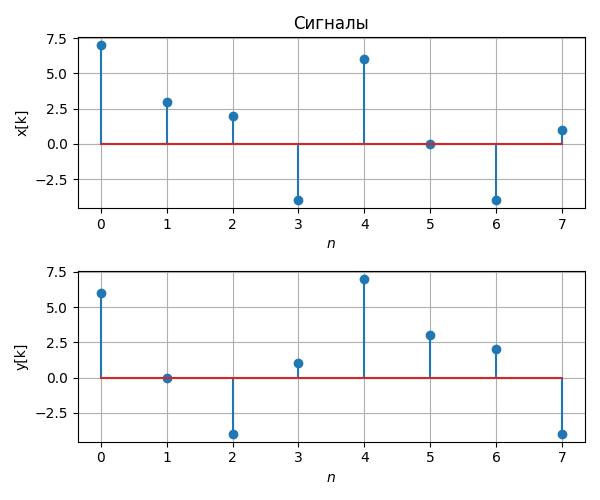

In [48]:
y = np.array(np.zeros(N))
for i in range(N):
    y[(i + 4) % N] = x[i]
    
plt.figure(figsize=[6, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.xticks(n)
plt.title('Сигналы')
plt.xlabel('$n$')
plt.ylabel('x[k]')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, y)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('y[k]')
plt.grid()

plt.tight_layout()
plt.show()